# Lab 7


In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold

## Problem 1

### Part 1

In [84]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data")
with open("/content/drive/MyDrive/PRML/Lab7/anneal.names") as f:
  names = f.read()
print(names)

1. Title of Database: Annealing Data

2. Source Information: donated by David Sterling and Wray Buntine.

3. Past Usage: unknown

4. Relevant Information:
   -- Explanation: I suspect this was left by Ross Quinlan in 1987 at the
      4th Machine Learning Workshop.  I'd have to check with Jeff Schlimmer
      to double check this.

5. Number of Instances: 798

6. Number of Attributes: 38
   -- 6 continuously-valued
   -- 3 integer-valued
   -- 29 nominal-valued

7. Attribute Information:
    1. family:		--,GB,GK,GS,TN,ZA,ZF,ZH,ZM,ZS
    2. product-type:	C, H, G
    3. steel:		-,R,A,U,K,M,S,W,V
    4. carbon:		continuous
    5. hardness:	continuous
    6. temper_rolling:	-,T
    7. condition:	-,S,A,X
    8. formability:	-,1,2,3,4,5
    9. strength:	continuous
   10. non-ageing:	-,N
   11. surface-finish:	P,M,-
   12. surface-quality: -,D,E,F,G
   13. enamelability:	-,1,2,3,4,5
   14. bc:		Y,-
   15. bf:		Y,-
   16. bt:		Y,-
   17. bw/me:		B,M,-
   18. bl:		Y,-
   19. m:		Y,-
   20. chro

In [85]:
cols = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper_rolling', 'condition', 'formability', 'strength', 'non-ageing', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing', 'class']
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data",names = cols)
dataset

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,class
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [86]:
for i in cols:
  print(dataset.groupby(i).size(),end="\n")

family
?     687
TN     60
ZS     51
dtype: int64
product-type
C    798
dtype: int64
steel
?     70
A    397
K     44
M     17
R    231
S      9
V     13
W     17
dtype: int64
carbon
0     730
3       1
4       4
6      11
8       2
10      2
45     13
55     17
65     14
70      4
dtype: int64
hardness
0     640
45     53
50     31
60     23
70     17
80      4
85     30
dtype: int64
temper_rolling
?    675
T    123
dtype: int64
condition
?    271
A     32
S    495
dtype: int64
formability
1     40
2    338
3    128
5      9
?    283
dtype: int64
strength
0      741
300      2
310     17
350      7
400      4
500     16
600     10
700      1
dtype: int64
non-ageing
?    703
N     95
dtype: int64
surface-finish
?    790
P      8
dtype: int64
surface-quality
?    217
D     50
E    278
F     53
G    200
dtype: int64
enamelability
1      5
2      8
?    785
dtype: int64
bc
?    797
Y      1
dtype: int64
bf
?    680
Y    118
dtype: int64
bt
?    736
Y     62
dtype: int64
bw/me
?    609
B  

In [87]:
# df = dataset.drop(["family","temper_rolling","non-ageing","surface-finish","enamelability","bc","bf","bt","bw/me","bl","m","oil","packing","chrom","phos","cbond","marvi","exptl","ferro","corr","blue/bright/varn/clean","lustre","jurofm","s","p"],axis = 1)
df = dataset.replace(to_replace = "?",value = np.nan)
df_test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.test",names = cols)
df_test = df_test.replace(to_replace = "?",value = np.nan)

In [88]:
perc = 75.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
dataset_final = df.dropna( axis=1, thresh=min_count)
min_count =  int(((100-perc)/100)*df_test.shape[0] + 1)
dataset_test = df_test.dropna(axis = 1,thresh = min_count)
test_dataset = dataset_final["class"]
test_final = dataset_test["class"]
dataset_final = dataset_final.drop("class",axis = 1)
dataset_test = dataset_test.drop("class",axis = 1)
for i in dataset_final.columns:
  dataset_final[i] = LabelEncoder().fit_transform(dataset_final[i])
dataset_final

,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore
0,0,0,4,0,1,4,0,3,0,13,39,0,0
1,0,3,0,0,1,1,0,1,0,44,39,0,0
2,0,3,0,0,1,1,0,1,1,13,62,15,0
3,0,0,0,3,2,4,0,3,0,42,25,0,0
4,0,0,0,3,2,4,0,3,1,17,16,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0,0,0,2,2,4,0,3,0,22,5,0,0
794,0,7,0,0,1,0,0,3,1,12,62,22,0
795,0,0,0,0,1,1,0,1,0,4,38,0,0
796,0,0,0,0,1,1,0,3,1,44,39,22,0


<AxesSubplot:>

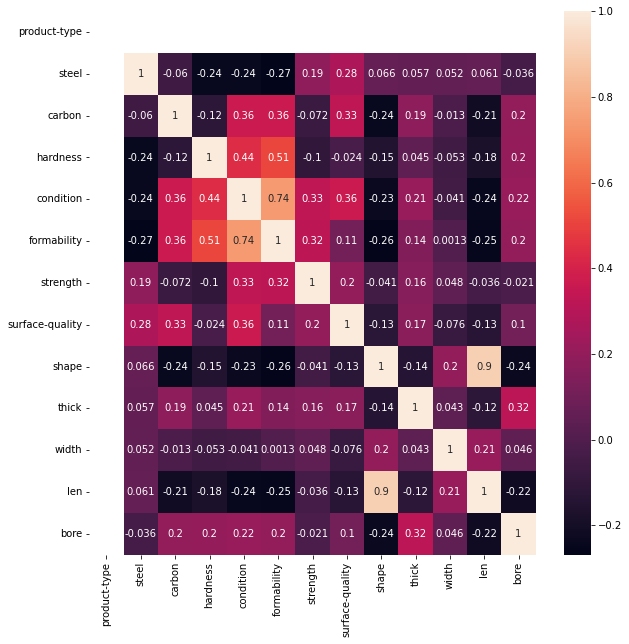

In [89]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(dataset_final.corr(),annot = True)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


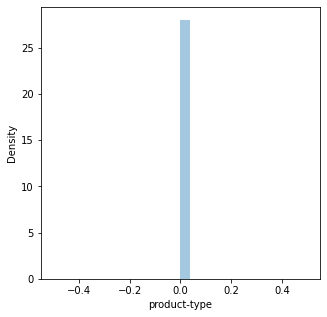

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


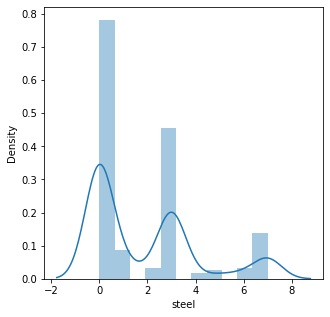

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


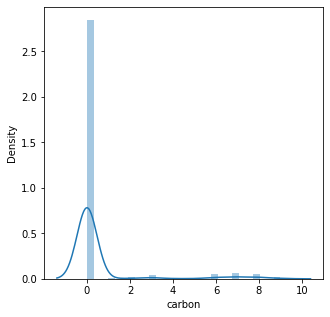

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


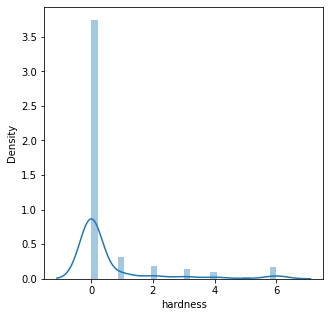

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


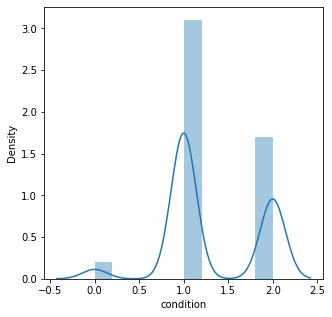

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


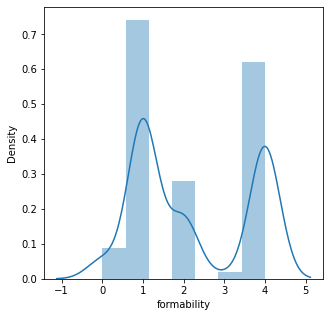

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


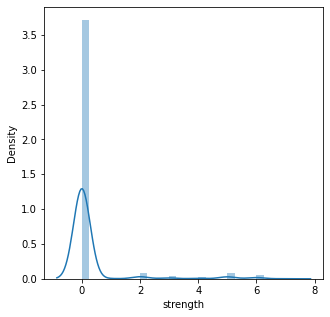

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


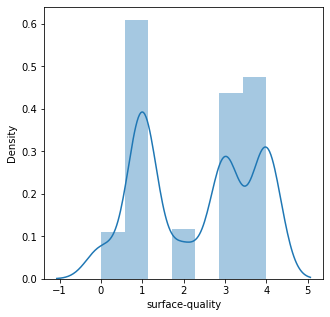

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


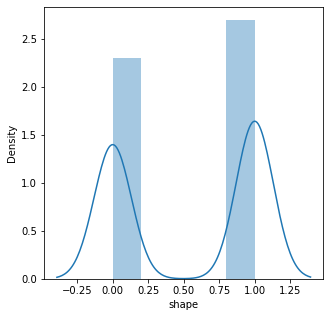

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


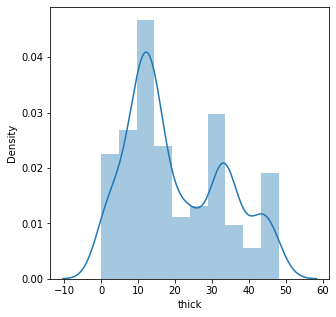

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


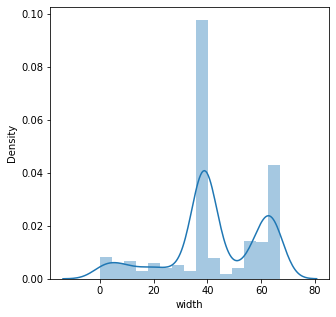

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


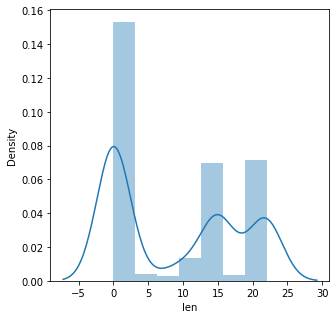

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


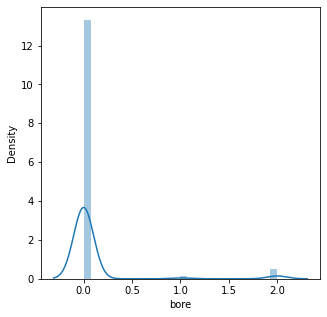

In [90]:
plt.rcParams["figure.figsize"] = (5,5)
for i in dataset_final.columns:
  sns.distplot(dataset_final[i])
  plt.show()

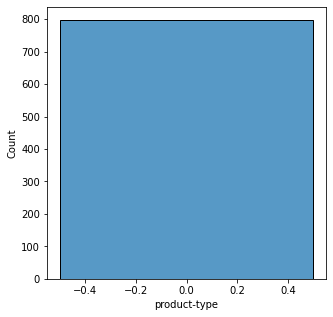

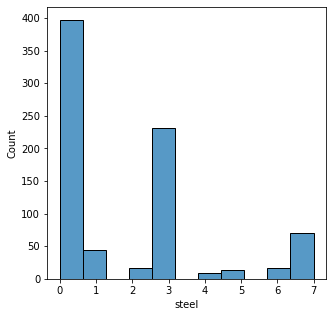

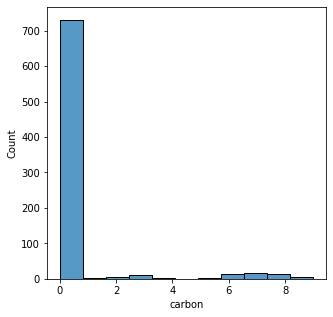

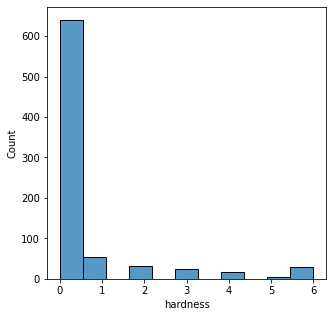

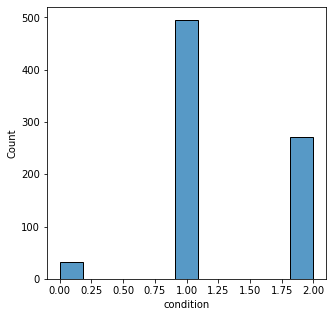

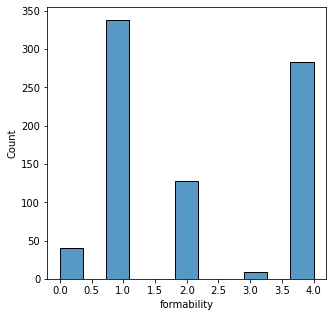

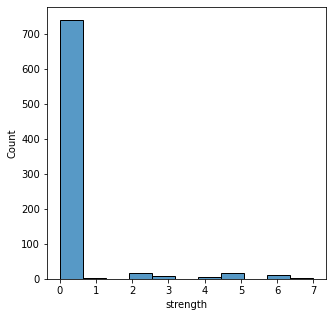

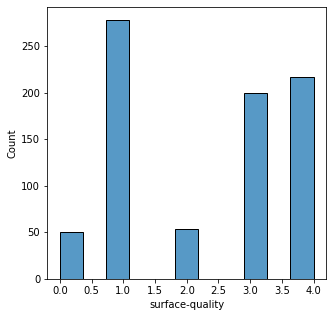

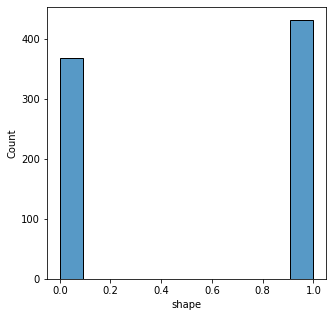

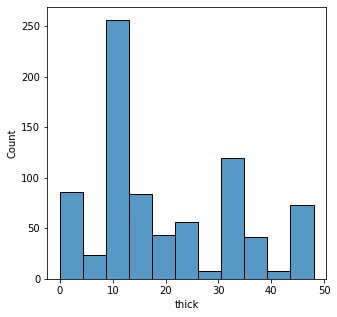

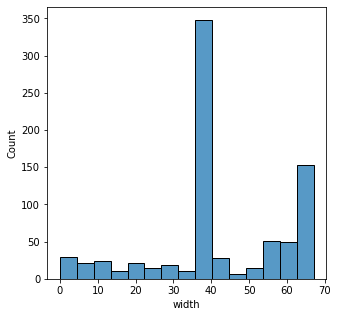

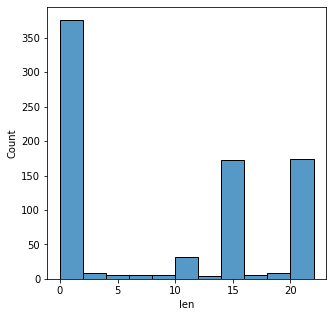

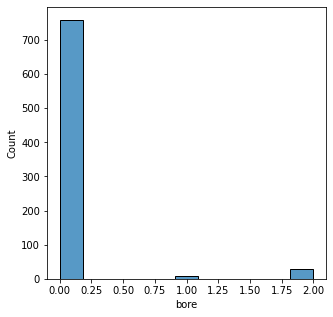

In [91]:
plt.rcParams["figure.figsize"] = (5,5)
for i in dataset_final.columns:
  sns.histplot(dataset_final[i])
  plt.show()

### Part 2

In [92]:
## Half of the preprocessing is done in part 1
## rest normalization is done here

In [93]:
dataset_final_scale = StandardScaler().fit_transform(dataset_final)
X_train,X_test,Y_train,Y_test = tts(dataset_final_scale,test_dataset,test_size=0.35,shuffle = True)
X_train.shape

(518, 13)

In [94]:
X_train_n,X_test_n,Y_train_n,Y_test_n = tts(dataset_final,test_dataset,test_size=0.35,shuffle = True)

### Part 3


In [102]:
## SVM
score_val = []
Kfold = KFold(5)
clf_svm = svm.SVC().fit(X_train,Y_train)
clf_svm_n = svm.SVC().fit(X_train_n,Y_train)

scores = cvs(clf_svm,dataset_final_scale,test_dataset,cv = Kfold)
print(scores)
score_val.append(scores)

[0.95625    0.9625     0.975      0.96855346 0.98742138]


In [103]:
## Bagging Classifier
Kfold = KFold(5)
clf_bc = BC().fit(X_train,Y_train)
clf_bc_n = BC().fit(X_train_n,Y_train)

scores = cvs(clf_bc,dataset_final_scale,test_dataset,cv = Kfold)
print(scores)
score_val.append(scores)

[0.95625    0.9875     0.99375    0.99371069 0.99371069]


In [104]:
# KNN
Kfold = KFold(5)
clf_knn = KNN().fit(X_train,Y_train)
clf_knn_n = KNN().fit(X_train_n,Y_train)

scores = cvs(clf_knn,dataset_final_scale,test_dataset,cv = Kfold)
print(scores)
score_val.append(scores)

[0.94375    0.94375    0.9625     0.96226415 0.96855346]


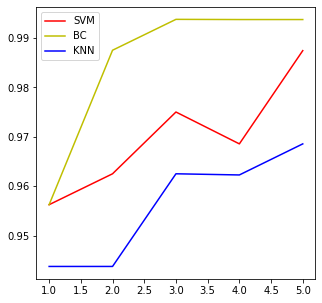

In [109]:
c = ['r','y','b']
label = ['SVM','BC','KNN']
j = 0
for i in score_val:
  plt.plot(range(1,6),i,color = c[j],label = label[j])
  j += 1
plt.legend()
plt.show()


In [ ]:
# We can say that bagging classifier gives the best accuracy